In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
km=pd.read_csv('/content/drive/MyDrive/DM22_23/Mall_Customers.csv')

In [4]:
km.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
km.shape

(200, 5)

In [6]:
km.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-abe8e48e8d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(km['Annual Income (k$)'])
<ipython-input-13-abe8e48e8d56>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(km['Age'])


Text(0, 0.5, 'Count')

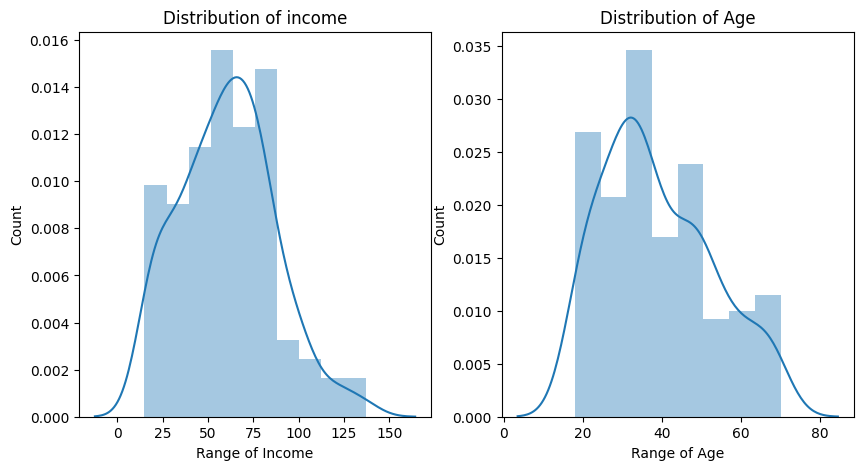

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(km['Annual Income (k$)'])
plt.title('Distribution of income')
plt.xlabel('Range of Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(km['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

In [14]:
df=km.iloc[:,[3,4]].values
print(df.shape)

(200, 2)


In [15]:
from sklearn.cluster import KMeans
km1=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=41)

In [16]:
km1.fit(df)

KMeans(n_clusters=2, n_init=10, random_state=41)

In [17]:
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [18]:
y_means=km1.fit_predict(df)

In [19]:
df[y_means==0,0]

array([15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33,
       33, 33, 34, 34, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 42,
       42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48,
       48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 57, 57, 58, 58])

Text(0, 0.5, 'Spending Score')

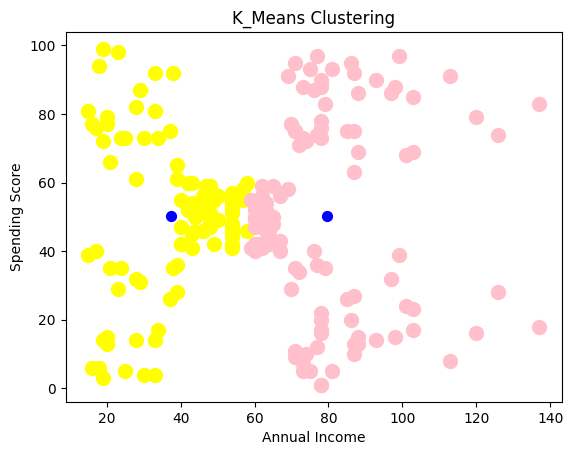

In [21]:
plt.scatter(df[y_means==0,0],df[y_means==0,1],s=100,c='yellow')
plt.scatter(df[y_means==1,0],df[y_means==1,1],s=100,c='pink')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],s=50,c='blue',label='centroid')
plt.title('K_Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')